In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np


In [ ]:
import keras
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

2.Visualize first 24 training images

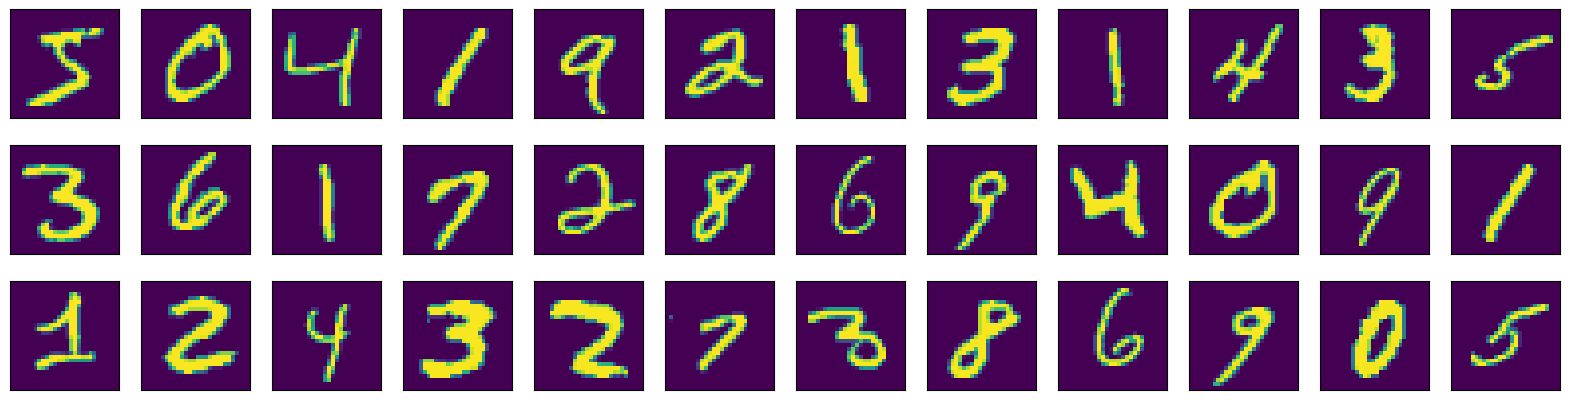

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

4. Break dataset into Training,Testing and Validation Sets

In [ ]:
x_test = x_test.reshape(-1,28,28)
x_test.shape

(10000, 28, 28)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (55000, 28, 28)
55000 train samples
10000 test samples
5000 validation samples


5.Define the Model Architechure

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=2, padding='same', activation='relu', 
                        input_shape=( 28, 28, 1 )))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 32)         0

6. Compile the Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

7.Train the Model

In [ ]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=3, save_best_only=True)

hist = model.fit (x_train, y_train, batch_size=28 , epochs=50,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=3, shuffle=True)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.31913, saving model to model.weights.best.hdf5
Epoch 2/50

Epoch 2: val_loss improved from 0.31913 to 0.10636, saving model to model.weights.best.hdf5
Epoch 3/50

Epoch 3: val_loss did not improve from 0.10636
Epoch 4/50

Epoch 4: val_loss did not improve from 0.10636
Epoch 5/50

Epoch 5: val_loss did not improve from 0.10636
Epoch 6/50

Epoch 6: val_loss improved from 0.10636 to 0.09881, saving model to model.weights.best.hdf5
Epoch 7/50

Epoch 7: val_loss did not improve from 0.09881
Epoch 8/50

Epoch 8: val_loss did not improve from 0.09881
Epoch 9/50

Epoch 9: val_loss did not improve from 0.09881
Epoch 10/50

Epoch 10: val_loss did not improve from 0.09881
Epoch 11/50

Epoch 11: val_loss did not improve from 0.09881
Epoch 12/50

Epoch 12: val_loss did not improve from 0.09881
Epoch 13/50

Epoch 13: val_loss did not improve from 0.09881
Epoch 14/50

Epoch 14: val_loss did not improve from 0.09881
Epoch 15/50

Epoch 15: val_loss d

8.Load The Model with the  Best Validation Accuracy 

In [ ]:
model.load_weights('model.weights.best.hdf5')

Visualize some Predictions

In [ ]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define integer labels (source: https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.html)
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']